# Azure Demand Forecasting – Milestone 1
## Notebook 01: Data Loading & Initial EDA

**Team:** Backend-B  
**Milestone:** Data Collection & Preparation  
**Date:** 20-08-25


In [30]:
import os
print(os.getcwd())


d:\infosysspringboard projects\project1-1stmilestine\AZURE_BACKEND_TEAM-B\notebooks


In [31]:
# Import libraries
import pandas as pd

# Load raw datasets
# Load Azure usage data

azure_df = pd.read_csv('../data/raw/azure_usage.csv')
# Load External factors data

external_df = pd.read_csv('../data/raw/external_factors.csv')
# Display first rows of each dataframe
display(azure_df.head())
display(external_df.head())


,date,region,resource_type,usage_cpu,usage_storage,users_active
0,2023-01-01,East US,VM,88,1959,470
1,2023-01-01,East US,Storage,92,1595,388
2,2023-01-01,East US,Container,70,621,414
3,2023-01-01,West US,VM,60,1982,287
4,2023-01-01,West US,Storage,85,1371,351


,date,economic_index,cloud_market_demand,holiday
0,2023-01-01,104.97,0.99,1
1,2023-01-02,106.48,1.15,0
2,2023-01-03,97.66,0.98,0
3,2023-01-04,115.79,1.08,0
4,2023-01-05,95.31,1.05,0


In [32]:
# Convert date columns to datetime
azure_df['date'] = pd.to_datetime(azure_df['date'])
external_df['date'] = pd.to_datetime(external_df['date'])

# Check data info and missing values

if (azure_df.isnull().sum().sum()==0):
    print("There is no missing values in the azure usage dataset")


if (external_df.isnull().sum().sum()==0):
    print("There is no missing values in the external factors dataset")




There is no missing values in the azure usage dataset
There is no missing values in the external factors dataset


In [33]:
# Print summary statistics for azure_df
print("Azure Usage Dataset infomation")
print("=" * 30)
print(f"Total entries: {len(azure_df)}")
print(f"Date range: {azure_df['date'].min().date()} to {azure_df['date'].max().date()}")
print(f"Unique regions: {azure_df['region'].nunique()} - {azure_df['region'].unique().tolist()}")
print(f"Unique resource_types: {azure_df['resource_type'].nunique()} - {azure_df['resource_type'].unique().tolist()}")
print(f"Average CPU usage: {azure_df['usage_cpu'].mean():.2f}%")
print(f"Average Storage usage: {azure_df['usage_storage'].mean():.2f} units")
print(f"Average active users: {azure_df['users_active'].mean():.2f}")

print("\nExternal Factors Dataset Summary")
print("=" * 30)
print(f"Total entries: {len(external_df)}")
if 'economic_index' in external_df.columns:
    print(f"Average Economic Index: {external_df['economic_index'].mean():.2f}")
if 'cloud_market_demand' in external_df.columns:
    print(f"Average Cloud Market Demand: {external_df['cloud_market_demand'].mean():.2f}")


Azure Usage Dataset infomation
Total entries: 1080
Date range: 2023-01-01 to 2023-03-31
Unique regions: 4 - ['East US', 'West US', 'North Europe', 'Southeast Asia']
Unique resource_types: 3 - ['VM', 'Storage', 'Container']
Average CPU usage: 74.65%
Average Storage usage: 1242.48 units
Average active users: 352.69

External Factors Dataset Summary
Total entries: 90
Average Economic Index: 98.93
Average Cloud Market Demand: 1.01


# Final Observations / Summary


# Azure Usage:


#  Average daily CPU usage per region

In [34]:
avg_daily_cpu =azure_df.groupby(['date', 'region'])['usage_cpu'].mean().reset_index()
print(avg_daily_cpu.head())

        date          region  usage_cpu
0 2023-01-01         East US  83.333333
1 2023-01-01    North Europe  68.666667
2 2023-01-01  Southeast Asia  82.000000
3 2023-01-01         West US  65.666667
4 2023-01-02         East US  91.666667


# Regionwise peak demand monthly 

In [35]:
azure_df['month'] = azure_df['date'].dt.to_period('M')
peak_demand_monthly = azure_df.groupby(['month', 'region'])['usage_cpu'].max().reset_index()
print(peak_demand_monthly.head())


     month          region  usage_cpu
0  2023-01         East US         98
1  2023-01    North Europe         99
2  2023-01  Southeast Asia         99
3  2023-01         West US         99
4  2023-02         East US         99


# top five cpu usage regions

In [36]:
total_usage_by_region = azure_df.groupby('region')['usage_cpu'].sum().reset_index()
top_5_regions = total_usage_by_region.sort_values('usage_cpu', ascending=False).head(5)
print(top_5_regions)


           region  usage_cpu
0         East US      20423
1    North Europe      20218
3         West US      20036
2  Southeast Asia      19947


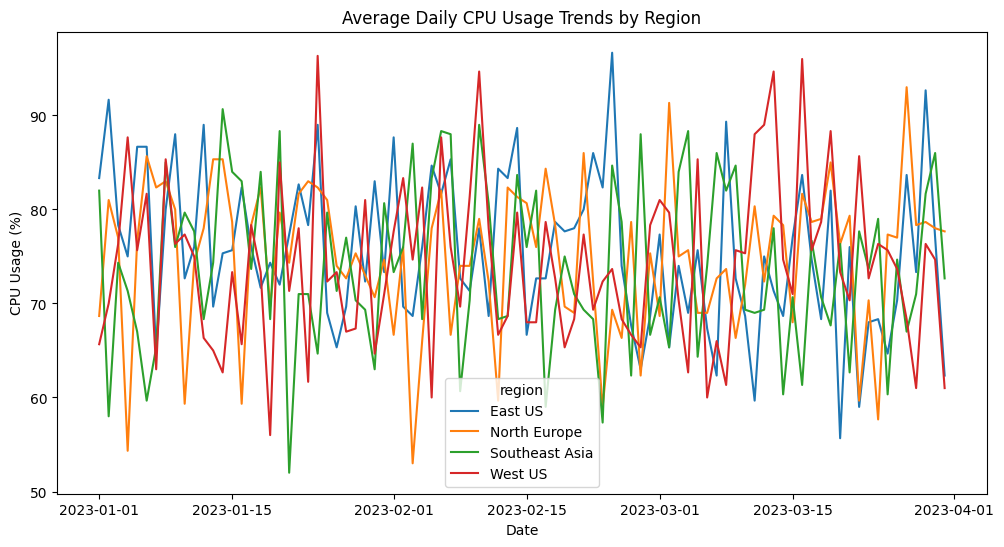

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=avg_daily_cpu, x='date', y='usage_cpu', hue='region')
plt.title('Average Daily CPU Usage Trends by Region')
plt.xlabel('Date')
plt.ylabel('CPU Usage (%)')
plt.show()


In [38]:
# Azure Usage:
num_records = len(azure_df)
regions_covered = azure_df['region'].unique().tolist()
avg_cpu_usage = azure_df['usage_cpu'].mean()
avg_storage_usage = azure_df['usage_storage'].mean()
active_users_min = azure_df['users_active'].min()
active_users_max = azure_df['users_active'].max()

print(f"Number of records: {num_records}")
print(f"Regions covered: {regions_covered}")
print(f"Average CPU usage: {avg_cpu_usage:.2f}")
print(f"Average Storage usage: {avg_storage_usage:.2f}")
print(f"Active users range: {active_users_min} - {active_users_max}")

Number of records: 1080
Regions covered: ['East US', 'West US', 'North Europe', 'Southeast Asia']
Average CPU usage: 74.65
Average Storage usage: 1242.48
Active users range: 200 - 499


# External Data:


In [39]:
economic_index_min = external_df['economic_index'].min()
economic_index_max = external_df['economic_index'].max()
market_demand_mean = external_df['cloud_market_demand'].mean()
market_demand_std = external_df['cloud_market_demand'].std()
holiday_unique_values = external_df['holiday'].unique()

print(f"Economic Index range: {economic_index_min} - {economic_index_max}")
print(f"Market Demand: Mean = {market_demand_mean:.3f}, Std = {market_demand_std:.3f}")
print(f"Holidays/weekend indicator included, unique values: {holiday_unique_values}")

Economic Index range: 73.8 - 118.86
Market Demand: Mean = 1.007, Std = 0.102
Holidays/weekend indicator included, unique values: [1 0]
